In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

import pytensor.printing
from pytensor.graph.basic import ancestors
from pytensor.d3viz import d3viz
import matplotlib.pyplot as plt
from pytensor.printing import pydotprint

In [2]:
az.style.use("arviz-whitegrid")
plt.rc('figure', dpi=450)

In [3]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n=1, p=theta_real).rvs(trials)
data

array([1, 0, 0, 0], dtype=int64)

In [4]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=theta, observed=data)

In [5]:
idata = pm.sample(1000, model=our_first_model, random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [6]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

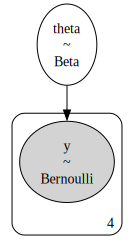

In [27]:
pm.model_to_graphviz(our_first_model)

In [28]:
our_first_model.basic_RVs

[theta ~ Beta(1, 1), y ~ Bernoulli(theta)]

In [11]:
pytensor.dprint(y)

bernoulli_rv{0, (0,), int64, False}.1 [id A] 'y'
 ├─ RandomGeneratorSharedVariable(<Generator(PCG64) at 0x21CC1F93BC0>) [id B]
 ├─ [4] [id C]
 ├─ 4 [id D]
 └─ beta_rv{0, (0, 0), floatX, False}.1 [id E] 'theta'
    ├─ RandomGeneratorSharedVariable(<Generator(PCG64) at 0x21CC1F92F80>) [id F]
    ├─ [] [id G]
    ├─ 11 [id H]
    ├─ 1.0 [id I]
    └─ 1.0 [id J]


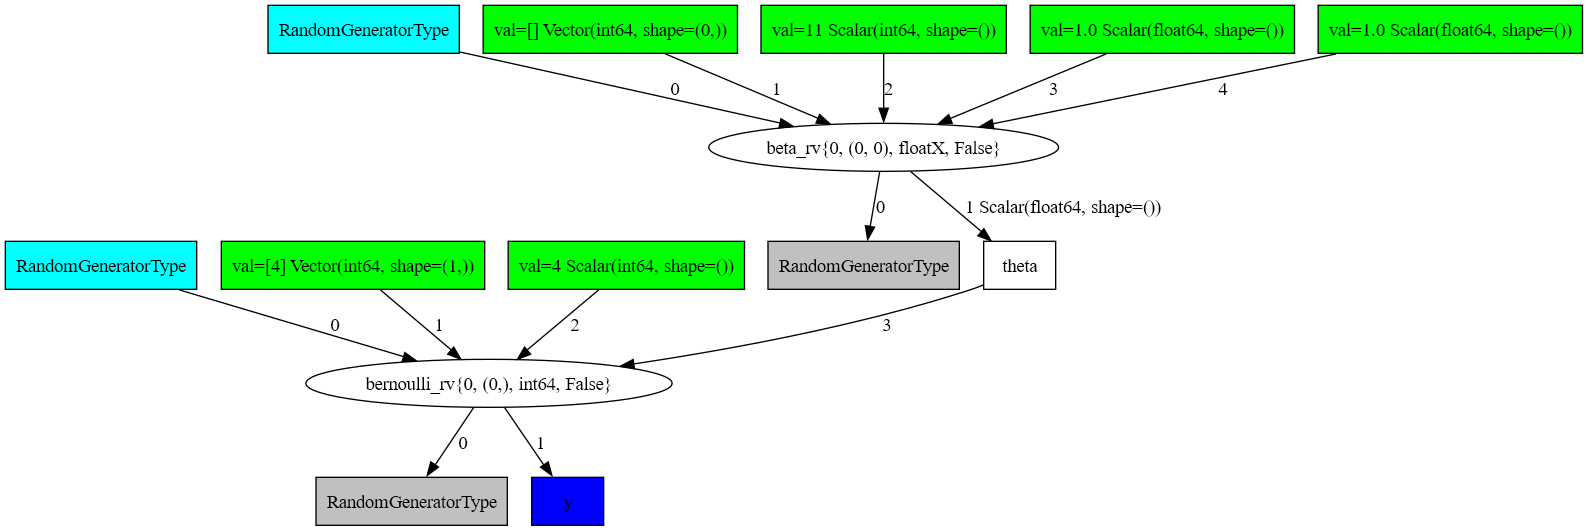

In [12]:
# Generate the graph image data without writing to disk
img_data = pydotprint(y, format="png", var_with_name_simple=True, return_image=True)

# Display the image in a Jupyter/Colab notebook
from IPython.display import Image, display
display(Image(img_data))

In [37]:
for i in range(10):
    print(f"Pytensor sample {i}: {theta.eval()}")

Pytensor sample 0: 0.8489881010519497
Pytensor sample 1: 0.8489881010519497
Pytensor sample 2: 0.8489881010519497
Pytensor sample 3: 0.8489881010519497
Pytensor sample 4: 0.8489881010519497
Pytensor sample 5: 0.8489881010519497
Pytensor sample 6: 0.8489881010519497
Pytensor sample 7: 0.8489881010519497
Pytensor sample 8: 0.8489881010519497
Pytensor sample 9: 0.8489881010519497


In [33]:
for i in range(10):
    print(f"Sample {i}: {pm.draw(theta)}")

Sample 0: 0.3214593328124708
Sample 1: 0.6024116644437375
Sample 2: 0.8895302033498534
Sample 3: 0.033945362500091766
Sample 4: 0.2711953028340261
Sample 5: 0.8961285453024458
Sample 6: 0.639780767253551
Sample 7: 0.20603848957463827
Sample 8: 0.29239404798906177
Sample 9: 0.8141154249184214


In [39]:
for i in range(10):
    random_theta, random_y = pm.draw([theta, y])
    print(f"Sample {i}: theta = {random_theta}, y = {random_y}")


Sample 0: theta = 0.3375088815740274, y = [0 0 0 0]
Sample 1: theta = 0.7348423891036555, y = [1 1 0 1]
Sample 2: theta = 0.7555484464678921, y = [1 0 0 1]
Sample 3: theta = 0.4807297894083154, y = [1 0 1 0]
Sample 4: theta = 0.18887547411749453, y = [0 0 0 0]
Sample 5: theta = 0.152209894942163, y = [0 0 0 0]
Sample 6: theta = 0.9786894287125124, y = [1 1 1 1]
Sample 7: theta = 0.8248149018377692, y = [0 1 0 1]
Sample 8: theta = 0.9336616771169851, y = [1 1 1 1]
Sample 9: theta = 0.8228300841338725, y = [1 1 0 1]


In [47]:
from scipy import special 

sample_theta  = pm.draw(theta)    

logp_func = our_first_model.compile_logp()
joint_logp = logp_func({"theta_logodds__": special.logit(sample_theta)})

print("Sampled theta:", sample_theta)
print("Sampled y:", data)
print("Joint log probability:", joint_logp)

Sampled theta: 0.3722104321712149
Sampled y: [1 0 0 0]
Joint log probability: -3.8387928204975976
